# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [19]:
# 1.
# Based on the final tumor volume box plots, it appears that the drug regimens Capomuloin and
# Ramicane are more effective than Infubinol and Ceftamin.
# The final tumor volumes for mice treated with Capomulin and Ramicane are lower than those
#  treated with Infubinol and Ceftamin, indicating a reduction
#  in tumor size over the course of the study.

# 2.
# The pie charts reveal that the gender distribution among mice is almost equal, with slightly
# more male mice (about 51%) than female mice (about 49%). This balanced distribution shows 
# that the results are not biased towards any specific gender.

# 3.
# The scatter plot and linear regression analysis for mice treated with Capomulin show a positive
#  correlation between mouse weight and avg tumor volume. Meaning mice with a higher weight tend
# to have larger tumors, which could be useful information when studying the relationship
# between body weight and tumor growth.


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")






# Display the data table for preview
print(merged_data)

In [2]:
# Checking the number of mice.
unique_mice = merged_data["Mouse ID"].nunique()
print("Unique Mice IDs:", unique_mice)


Unique Mice IDs: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_data = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicated_mouse_id = duplicated_data["Mouse ID"].unique()[0]
print("Mouse ID with duplicated timepoints:", duplicated_mouse_id)
print("Duplicated data:")
print(duplicated_data)

Mouse ID with duplicated timepoints: g989
Duplicated data:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[merged_data["Mouse ID"] != duplicated_mouse_id]


In [5]:
# Checking the number of mice in the clean DataFrame.
print("Updated number of unique mice IDs:", cleaned_data["Mouse ID"].nunique())

Updated number of unique mice IDs: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor_volume = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev_tumor_volume = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_volume = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_stats_df = pd.DataFrame({"Mean": mean_tumor_volume,
                                 "Median": median_tumor_volume,
                                 "Variance": variance_tumor_volume,
                                 "Standard Deviation": std_dev_tumor_volume,
                                 "SEM": sem_tumor_volume})

print(summary_stats_df)


                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
print(summary_stats)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

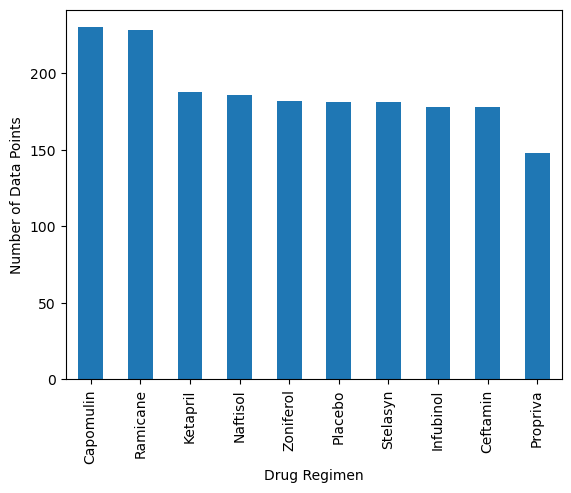

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_chart_data = cleaned_data["Drug Regimen"].value_counts()

# Using pandas
bar_chart_data.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

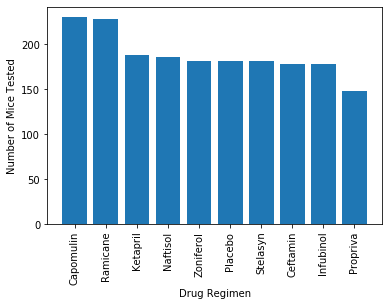

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(bar_chart_data.index, bar_chart_data.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation=90)
plt.show()


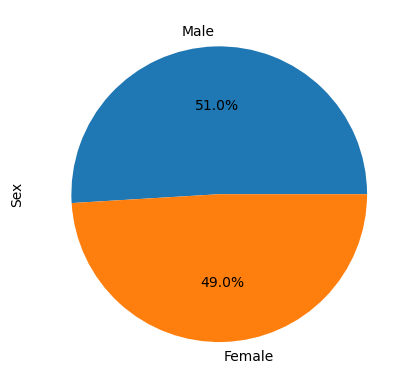

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart_data = cleaned_data["Sex"].value_counts()
pie_chart_data.plot(kind="pie", autopct="%1.1f%%")
plt.show()

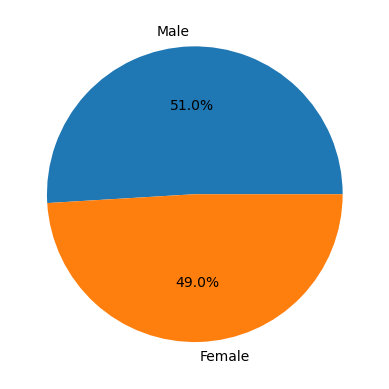

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_chart_data.values, labels=pie_chart_data.index, autopct="%1.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby("Mouse ID")["Timepoint"].max().reset_index()
merged_last_timepoint = pd.merge(last_timepoint, cleaned_data, on=["Mouse ID", "Timepoint"])

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volumes = []

for treatment in treatments:
    final_tumor_volume = merged_last_timepoint.loc[merged_last_timepoint["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_volumes.append(final_tumor_volume)
    
    quartiles = final_tumor_volume.quantile([0.25, 0.5, 0.75])
    iqr = quartiles[0.75] - quartiles[0.25]
    lower_bound = quartiles[0.25] - (1.5 * iqr)
    upper_bound = quartiles[0.75] + (1.5 * iqr)

    outliers = final_tumor_volume[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    print(f"{treatment} outliers: {outliers}")
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


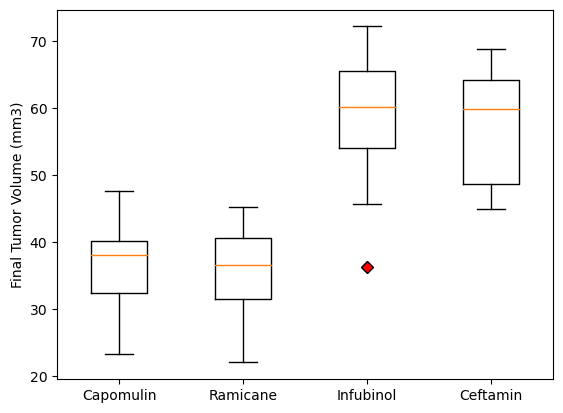

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_volumes, labels=treatments, flierprops={'markerfacecolor': 'r', 'marker': 'D'})
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

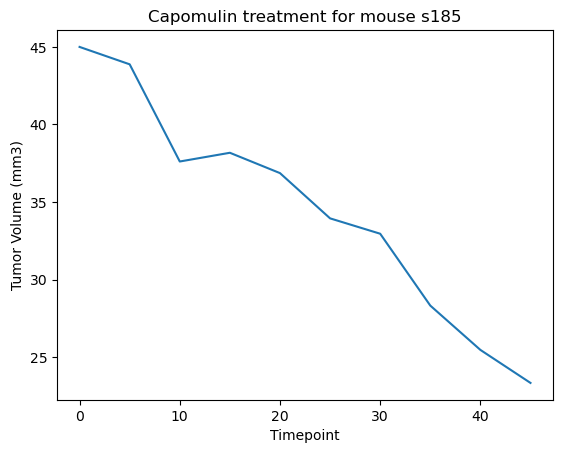

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Line plot
capomulin_mouse = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"].iloc[0]["Mouse ID"]
capomulin_mouse_data = cleaned_data.loc[cleaned_data["Mouse ID"] == capomulin_mouse]

plt.plot(capomulin_mouse_data["Timepoint"], capomulin_mouse_data["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment for mouse {capomulin_mouse}")
plt.show()




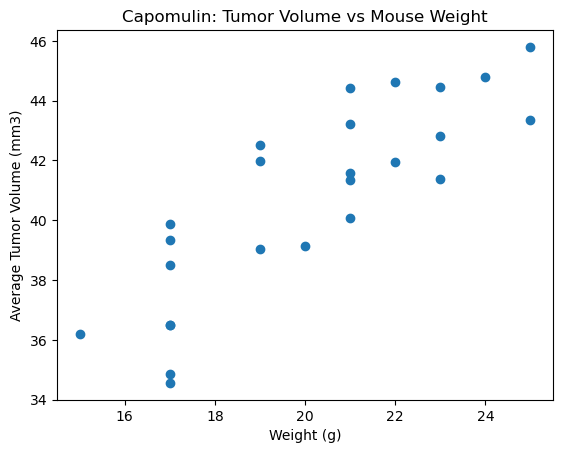

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Scatter plot
capomulin_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]
capomulin_weight_tumor = capomulin_data.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"})

plt.scatter(capomulin_weight_tumor["Weight (g)"], capomulin_weight_tumor["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin: Tumor Volume vs Mouse Weight")
plt.show()


## Correlation and Regression

Correlation coefficient: 0.841936342469472


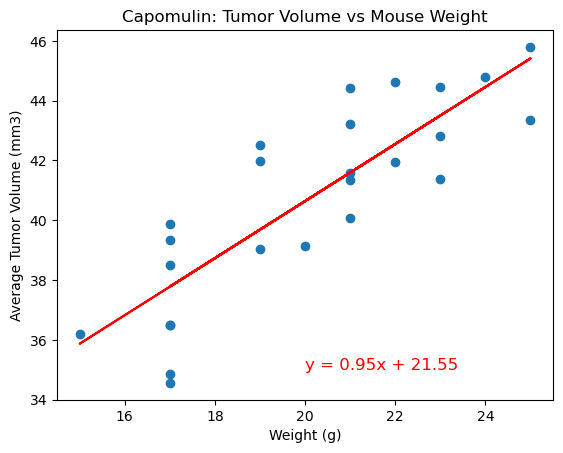

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation_coefficient = sts.pearsonr(capomulin_weight_tumor["Weight (g)"], capomulin_weight_tumor["Tumor Volume (mm3)"])[0]
print("Correlation coefficient:", correlation_coefficient)

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(capomulin_weight_tumor["Weight (g)"], capomulin_weight_tumor["Tumor Volume (mm3)"])
regress_values = capomulin_weight_tumor["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(capomulin_weight_tumor["Weight (g)"], capomulin_weight_tumor["Tumor Volume (mm3)"])
plt.plot(capomulin_weight_tumor["Weight (g)"], regress_values, "r-")
plt.annotate(line_eq, (20, 35), fontsize=12, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin: Tumor Volume vs Mouse Weight")
plt.show()

